In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
fiscal_df = pd.read_csv('data/Sdf16_1a.txt', sep = '\t')
rla_df = pd.read_csv('data/rla-achievement-lea-sy2015-16.csv', sep = ',')
math_df = pd.read_csv('data/math-achievement-lea-sy2015-16.csv', sep = ',')

membership_df = pd.read_csv('data/ccd_lea_052_1516_w_1a_011717.csv', sep = ',')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,45,129,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


In [96]:
fiscal_df['TFEDREV'].sum() * .15

8340410870.7

In [100]:
to_cut = fiscal_df['TFEDREV'].sum() * .15
tocut_df = fiscal_df[['LEAID','TOTALEXP','V33', 'STNAME', 'NAME', 'TFEDREV']]
tocut_df = tocut_df[(tocut_df['TFEDREV'] > 0) & (tocut_df['V33'] > 0)]
tocut_df['percapita_spending'] = tocut_df['TFEDREV']/tocut_df['V33']

In [104]:
for i, v in tocut_df.sort_values('percapita_spending', ascending = False).iterrows():
    
    if ((to_cut - (v['TFEDREV'] * .20)) > 0):
        
        #print('to_cut: %f' % (v['TFEDREV'] * .20))
        #print('remaning %f' % to_cut)
        #print('\n')
        
        tocut_df.loc[i, 'to_cut'] = v['TFEDREV'] * .20
        to_cut -= (v['TFEDREV'] * .20)


        tocut_df.loc[i, 'STNAME'] = v['STNAME']
        tocut_df.loc[i, 'NAME'] = v['NAME']
        
    else:
        tocut_df.loc[i, 'to_cut'] = 0

to_cut: 2734800.000000
remaning 8340410870.700000
to_cut: 3800600.000000
remaning 8337676070.700000
to_cut: 1373200.000000
remaning 8333875470.700000
to_cut: 4655400.000000
remaning 8332502270.700000
to_cut: 4546600.000000
remaning 8327846870.700000
to_cut: 51655200.000000
remaning 8323300270.700000
to_cut: 7497000.000000
remaning 8271645070.700000
to_cut: 1634600.000000
remaning 8264148070.700000
to_cut: 2447000.000000
remaning 8262513470.700000
to_cut: 2713200.000000
remaning 8260066470.700000
to_cut: 1634600.000000
remaning 8257353270.700000
to_cut: 1080000.000000
remaning 8255718670.700000
to_cut: 5124200.000000
remaning 8254638670.700000
to_cut: 2498000.000000
remaning 8249514470.700000
to_cut: 5543800.000000
remaning 8247016470.700000
to_cut: 13922400.000000
remaning 8241472670.700000
to_cut: 3216600.000000
remaning 8227550270.700000
to_cut: 15588400.000000
remaning 8224333670.700000
to_cut: 2305400.000000
remaning 8208745270.700000
to_cut: 11657000.000000
remaning 8206439870.700

to_cut: 163800.000000
remaning 7923452670.700000
to_cut: 186800.000000
remaning 7923288870.700000
to_cut: 2539600.000000
remaning 7923102070.700000
to_cut: 636400.000000
remaning 7920562470.700000
to_cut: 8525200.000000
remaning 7919926070.700000
to_cut: 178000.000000
remaning 7911400870.700000
to_cut: 64200.000000
remaning 7911222870.700000
to_cut: 4000.000000
remaning 7911158670.700000
to_cut: 733000.000000
remaning 7911154670.700000
to_cut: 503200.000000
remaning 7910421670.700000
to_cut: 885800.000000
remaning 7909918470.700000
to_cut: 615200.000000
remaning 7909032670.700000
to_cut: 136400.000000
remaning 7908417470.700000
to_cut: 763400.000000
remaning 7908281070.700000
to_cut: 7800.000000
remaning 7907517670.700000
to_cut: 425000.000000
remaning 7907509870.700000
to_cut: 129000.000000
remaning 7907084870.700000
to_cut: 879800.000000
remaning 7906955870.700000
to_cut: 533400.000000
remaning 7906076070.700000
to_cut: 204800.000000
remaning 7905542670.700000
to_cut: 120600.000000
r

to_cut: 152000.000000
remaning 7725423070.700000
to_cut: 58000.000000
remaning 7725271070.700000
to_cut: 85800.000000
remaning 7725213070.700000
to_cut: 5400.000000
remaning 7725127270.700000
to_cut: 146000.000000
remaning 7725121870.700000
to_cut: 33000.000000
remaning 7724975870.700000
to_cut: 991400.000000
remaning 7724942870.700000
to_cut: 25494000.000000
remaning 7723951470.700000
to_cut: 3800.000000
remaning 7698457470.700000
to_cut: 109400.000000
remaning 7698453670.700000
to_cut: 434200.000000
remaning 7698344270.700000
to_cut: 367600.000000
remaning 7697910070.700000
to_cut: 738600.000000
remaning 7697542470.700000
to_cut: 199400.000000
remaning 7696803870.700000
to_cut: 1035400.000000
remaning 7696604470.700000
to_cut: 2259400.000000
remaning 7695569070.700000
to_cut: 162800.000000
remaning 7693309670.700000
to_cut: 76400.000000
remaning 7693146870.700000
to_cut: 54600.000000
remaning 7693070470.700000
to_cut: 16400.000000
remaning 7693015870.700000
to_cut: 556400.000000
rema

to_cut: 75600.000000
remaning 7555196270.700000
to_cut: 272400.000000
remaning 7555120670.700000
to_cut: 3000.000000
remaning 7554848270.700000
to_cut: 1800.000000
remaning 7554845270.700000
to_cut: 3600.000000
remaning 7554843470.700000
to_cut: 659000.000000
remaning 7554839870.700000
to_cut: 435000.000000
remaning 7554180870.700000
to_cut: 69400.000000
remaning 7553745870.700000
to_cut: 2197800.000000
remaning 7553676470.700000
to_cut: 51400.000000
remaning 7551478670.700000
to_cut: 616000.000000
remaning 7551427270.700000
to_cut: 2055400.000000
remaning 7550811270.700000
to_cut: 305000.000000
remaning 7548755870.700000
to_cut: 1004200.000000
remaning 7548450870.700000
to_cut: 103200.000000
remaning 7547446670.700000
to_cut: 186800.000000
remaning 7547343470.700000
to_cut: 64600.000000
remaning 7547156670.700000
to_cut: 99400.000000
remaning 7547092070.700000
to_cut: 151400.000000
remaning 7546992670.700000
to_cut: 40200.000000
remaning 7546841270.700000
to_cut: 102200.000000
remanin

to_cut: 131800.000000
remaning 7364327670.700000
to_cut: 1241800.000000
remaning 7364195870.700000
to_cut: 192800.000000
remaning 7362954070.700000
to_cut: 477600.000000
remaning 7362761270.700000
to_cut: 461000.000000
remaning 7362283670.700000
to_cut: 1465600.000000
remaning 7361822670.700000
to_cut: 134800.000000
remaning 7360357070.700000
to_cut: 75600.000000
remaning 7360222270.700000
to_cut: 3600.000000
remaning 7360146670.700000
to_cut: 186600.000000
remaning 7360143070.700000
to_cut: 2598800.000000
remaning 7359956470.700000
to_cut: 99200.000000
remaning 7357357670.700000
to_cut: 1419800.000000
remaning 7357258470.700000
to_cut: 468400.000000
remaning 7355838670.700000
to_cut: 660400.000000
remaning 7355370270.700000
to_cut: 5681800.000000
remaning 7354709870.700000
to_cut: 115000.000000
remaning 7349028070.700000
to_cut: 42600.000000
remaning 7348913070.700000
to_cut: 791200.000000
remaning 7348870470.700000
to_cut: 83600.000000
remaning 7348079270.700000
to_cut: 56400.000000


to_cut: 20416600.000000
remaning 7206117870.700000
to_cut: 35749800.000000
remaning 7185701270.700000
to_cut: 131600.000000
remaning 7149951470.700000
to_cut: 247400.000000
remaning 7149819870.700000
to_cut: 14600.000000
remaning 7149572470.700000
to_cut: 1527200.000000
remaning 7149557870.700000
to_cut: 243400.000000
remaning 7148030670.700000
to_cut: 93200.000000
remaning 7147787270.700000
to_cut: 749400.000000
remaning 7147694070.700000
to_cut: 96400.000000
remaning 7146944670.700000
to_cut: 242600.000000
remaning 7146848270.700000
to_cut: 929800.000000
remaning 7146605670.700000
to_cut: 1584600.000000
remaning 7145675870.700000
to_cut: 457200.000000
remaning 7144091270.700000
to_cut: 626800.000000
remaning 7143634070.700000
to_cut: 180400.000000
remaning 7143007270.700000
to_cut: 1026000.000000
remaning 7142826870.700000
to_cut: 525600.000000
remaning 7141800870.700000
to_cut: 299200.000000
remaning 7141275270.700000
to_cut: 488000.000000
remaning 7140976070.700000
to_cut: 5222800.

to_cut: 875600.000000
remaning 7003840870.700000
to_cut: 1484400.000000
remaning 7002965270.700000
to_cut: 341400.000000
remaning 7001480870.700000
to_cut: 80000.000000
remaning 7001139470.700000
to_cut: 296200.000000
remaning 7001059470.700000
to_cut: 109800.000000
remaning 7000763270.700000
to_cut: 252000.000000
remaning 7000653470.700000
to_cut: 41200.000000
remaning 7000401470.700000
to_cut: 116200.000000
remaning 7000360270.700000
to_cut: 279200.000000
remaning 7000244070.700000
to_cut: 13000.000000
remaning 6999964870.700000
to_cut: 542400.000000
remaning 6999951870.700000
to_cut: 169800.000000
remaning 6999409470.700000
to_cut: 2550600.000000
remaning 6999239670.700000
to_cut: 4319200.000000
remaning 6996689070.700000
to_cut: 878200.000000
remaning 6992369870.700000
to_cut: 1280000.000000
remaning 6991491670.700000
to_cut: 128200.000000
remaning 6990211670.700000
to_cut: 22000.000000
remaning 6990083470.700000
to_cut: 5600.000000
remaning 6990061470.700000
to_cut: 213600.000000


to_cut: 18600.000000
remaning 6648746270.700000
to_cut: 116400.000000
remaning 6648727670.700000
to_cut: 2631800.000000
remaning 6648611270.700000
to_cut: 540000.000000
remaning 6645979470.700000
to_cut: 498600.000000
remaning 6645439470.700000
to_cut: 71800.000000
remaning 6644940870.700000
to_cut: 146800.000000
remaning 6644869070.700000
to_cut: 863000.000000
remaning 6644722270.700000
to_cut: 81000.000000
remaning 6643859270.700000
to_cut: 190800.000000
remaning 6643778270.700000
to_cut: 1996800.000000
remaning 6643587470.700000
to_cut: 355800.000000
remaning 6641590670.700000
to_cut: 66800.000000
remaning 6641234870.700000
to_cut: 113000.000000
remaning 6641168070.700000
to_cut: 38200.000000
remaning 6641055070.700000
to_cut: 87600.000000
remaning 6641016870.700000
to_cut: 406200.000000
remaning 6640929270.700000
to_cut: 5691000.000000
remaning 6640523070.700000
to_cut: 149400.000000
remaning 6634832070.700000
to_cut: 718000.000000
remaning 6634682670.700000
to_cut: 155000.000000
r

to_cut: 113400.000000
remaning 6483442070.700000
to_cut: 31400.000000
remaning 6483328670.700000
to_cut: 62400.000000
remaning 6483297270.700000
to_cut: 510600.000000
remaning 6483234870.700000
to_cut: 314200.000000
remaning 6482724270.700000
to_cut: 1911600.000000
remaning 6482410070.700000
to_cut: 831600.000000
remaning 6480498470.700000
to_cut: 83800.000000
remaning 6479666870.700000
to_cut: 1124200.000000
remaning 6479583070.700000
to_cut: 920600.000000
remaning 6478458870.700000
to_cut: 135000.000000
remaning 6477538270.700000
to_cut: 181600.000000
remaning 6477403270.700000
to_cut: 151000.000000
remaning 6477221670.700000
to_cut: 77200.000000
remaning 6477070670.700000
to_cut: 1288600.000000
remaning 6476993470.700000
to_cut: 340800.000000
remaning 6475704870.700000
to_cut: 5858400.000000
remaning 6475364070.700000
to_cut: 139800.000000
remaning 6469505670.700000
to_cut: 194800.000000
remaning 6469365870.700000
to_cut: 329600.000000
remaning 6469171070.700000
to_cut: 5708000.0000

to_cut: 445800.000000
remaning 6235192670.700000
to_cut: 152600.000000
remaning 6234746870.700000
to_cut: 563000.000000
remaning 6234594270.700000
to_cut: 28600.000000
remaning 6234031270.700000
to_cut: 228200.000000
remaning 6234002670.700000
to_cut: 390800.000000
remaning 6233774470.700000
to_cut: 262200.000000
remaning 6233383670.700000
to_cut: 352200.000000
remaning 6233121470.700000
to_cut: 8950600.000000
remaning 6232769270.700000
to_cut: 1553200.000000
remaning 6223818670.700000
to_cut: 274000.000000
remaning 6222265470.700000
to_cut: 503000.000000
remaning 6221991470.700000
to_cut: 262600.000000
remaning 6221488470.700000
to_cut: 194200.000000
remaning 6221225870.700000
to_cut: 153200.000000
remaning 6221031670.700000
to_cut: 1420200.000000
remaning 6220878470.700000
to_cut: 16800.000000
remaning 6219458270.700000
to_cut: 11909000.000000
remaning 6219441470.700000
to_cut: 842800.000000
remaning 6207532470.700000
to_cut: 1877400.000000
remaning 6206689670.700000
to_cut: 402600.0

to_cut: 10434400.000000
remaning 5639089270.700000
to_cut: 1354800.000000
remaning 5628654870.700000
to_cut: 28200.000000
remaning 5627300070.700000
to_cut: 80000.000000
remaning 5627271870.700000
to_cut: 4497800.000000
remaning 5627191870.700000
to_cut: 1394600.000000
remaning 5622694070.700000
to_cut: 337200.000000
remaning 5621299470.700000
to_cut: 818000.000000
remaning 5620962270.700000
to_cut: 280400.000000
remaning 5620144270.700000
to_cut: 20400.000000
remaning 5619863870.700000
to_cut: 189200.000000
remaning 5619843470.700000
to_cut: 482400.000000
remaning 5619654270.700000
to_cut: 11600.000000
remaning 5619171870.700000
to_cut: 52000.000000
remaning 5619160270.700000
to_cut: 177400.000000
remaning 5619108270.700000
to_cut: 912600.000000
remaning 5618930870.700000
to_cut: 281000.000000
remaning 5618018270.700000
to_cut: 4335200.000000
remaning 5617737270.700000
to_cut: 143200.000000
remaning 5613402070.700000
to_cut: 133000.000000
remaning 5613258870.700000
to_cut: 60000.00000

to_cut: 404600.000000
remaning 5215083670.700000
to_cut: 19600.000000
remaning 5214679070.700000
to_cut: 893800.000000
remaning 5214659470.700000
to_cut: 2369000.000000
remaning 5213765670.700000
to_cut: 140200.000000
remaning 5211396670.700000
to_cut: 2176600.000000
remaning 5211256470.700000
to_cut: 439200.000000
remaning 5209079870.700000
to_cut: 2022400.000000
remaning 5208640670.700000
to_cut: 5400.000000
remaning 5206618270.700000
to_cut: 453600.000000
remaning 5206612870.700000
to_cut: 50600.000000
remaning 5206159270.700000
to_cut: 735600.000000
remaning 5206108670.700000
to_cut: 51600.000000
remaning 5205373070.700000
to_cut: 70800.000000
remaning 5205321470.700000
to_cut: 799200.000000
remaning 5205250670.700000
to_cut: 85600.000000
remaning 5204451470.700000
to_cut: 105800.000000
remaning 5204365870.700000
to_cut: 773200.000000
remaning 5204260070.700000
to_cut: 341200.000000
remaning 5203486870.700000
to_cut: 172400.000000
remaning 5203145670.700000
to_cut: 333000.000000
re

to_cut: 59600.000000
remaning 5025173870.700000
to_cut: 113000.000000
remaning 5025114270.700000
to_cut: 963800.000000
remaning 5025001270.700000
to_cut: 5237800.000000
remaning 5024037470.700000
to_cut: 1990400.000000
remaning 5018799670.700000
to_cut: 219600.000000
remaning 5016809270.700000
to_cut: 4843400.000000
remaning 5016589670.700000
to_cut: 138200.000000
remaning 5011746270.700000
to_cut: 153800.000000
remaning 5011608070.700000
to_cut: 110800.000000
remaning 5011454270.700000
to_cut: 103600.000000
remaning 5011343470.700000
to_cut: 1200600.000000
remaning 5011239870.700000
to_cut: 47400.000000
remaning 5010039270.700000
to_cut: 1579000.000000
remaning 5009991870.700000
to_cut: 19800.000000
remaning 5008412870.700000
to_cut: 90800.000000
remaning 5008393070.700000
to_cut: 15666200.000000
remaning 5008302270.700000
to_cut: 5260000.000000
remaning 4992636070.700000
to_cut: 28200.000000
remaning 4987376070.700000
to_cut: 65800.000000
remaning 4987347870.700000
to_cut: 998000.000

to_cut: 199600.000000
remaning 4860349670.700000
to_cut: 272600.000000
remaning 4860150070.700000
to_cut: 1357400.000000
remaning 4859877470.700000
to_cut: 1630200.000000
remaning 4858520070.700000
to_cut: 180600.000000
remaning 4856889870.700000
to_cut: 415000.000000
remaning 4856709270.700000
to_cut: 4249800.000000
remaning 4856294270.700000
to_cut: 545800.000000
remaning 4852044470.700000
to_cut: 2040200.000000
remaning 4851498670.700000
to_cut: 149400.000000
remaning 4849458470.700000
to_cut: 2863800.000000
remaning 4849309070.700000
to_cut: 207200.000000
remaning 4846445270.700000
to_cut: 560600.000000
remaning 4846238070.700000
to_cut: 440800.000000
remaning 4845677470.700000
to_cut: 609600.000000
remaning 4845236670.700000
to_cut: 27374600.000000
remaning 4844627070.700000
to_cut: 1010800.000000
remaning 4817252470.700000
to_cut: 70400.000000
remaning 4816241670.700000
to_cut: 2527800.000000
remaning 4816171270.700000
to_cut: 24200.000000
remaning 4813643470.700000
to_cut: 19800

to_cut: 168000.000000
remaning 4658785870.700000
to_cut: 12423800.000000
remaning 4658617870.700000
to_cut: 153600.000000
remaning 4646194070.700000
to_cut: 861000.000000
remaning 4646040470.700000
to_cut: 169400.000000
remaning 4645179470.700000
to_cut: 149600.000000
remaning 4645010070.700000
to_cut: 987000.000000
remaning 4644860470.700000
to_cut: 84800.000000
remaning 4643873470.700000
to_cut: 139200.000000
remaning 4643788670.700000
to_cut: 130600.000000
remaning 4643649470.700000
to_cut: 155200.000000
remaning 4643518870.700000
to_cut: 343200.000000
remaning 4643363670.700000
to_cut: 178800.000000
remaning 4643020470.700000
to_cut: 2357200.000000
remaning 4642841670.700000
to_cut: 904000.000000
remaning 4640484470.700000
to_cut: 677000.000000
remaning 4639580470.700000
to_cut: 26400.000000
remaning 4638903470.700000
to_cut: 105600.000000
remaning 4638877070.700000
to_cut: 44600.000000
remaning 4638771470.700000
to_cut: 170200.000000
remaning 4638726870.700000
to_cut: 54000.000000

to_cut: 252800.000000
remaning 4485858670.700000
to_cut: 349600.000000
remaning 4485605870.700000
to_cut: 374600.000000
remaning 4485256270.700000
to_cut: 921200.000000
remaning 4484881670.700000
to_cut: 156400.000000
remaning 4483960470.700000
to_cut: 288600.000000
remaning 4483804070.700000
to_cut: 114200.000000
remaning 4483515470.700000
to_cut: 83200.000000
remaning 4483401270.700000
to_cut: 29200.000000
remaning 4483318070.700000
to_cut: 669800.000000
remaning 4483288870.700000
to_cut: 2791400.000000
remaning 4482619070.700000
to_cut: 213200.000000
remaning 4479827670.700000
to_cut: 138000.000000
remaning 4479614470.700000
to_cut: 506000.000000
remaning 4479476470.700000
to_cut: 551400.000000
remaning 4478970470.700000
to_cut: 5600.000000
remaning 4478419070.700000
to_cut: 1290000.000000
remaning 4478413470.700000
to_cut: 180600.000000
remaning 4477123470.700000
to_cut: 53600.000000
remaning 4476942870.700000
to_cut: 3643800.000000
remaning 4476889270.700000
to_cut: 111600.000000


to_cut: 15439000.000000
remaning 4190098270.700000
to_cut: 155000.000000
remaning 4174659270.700000
to_cut: 10600.000000
remaning 4174504270.700000
to_cut: 646000.000000
remaning 4174493670.700000
to_cut: 717600.000000
remaning 4173847670.700000
to_cut: 636200.000000
remaning 4173130070.700000
to_cut: 205000.000000
remaning 4172493870.700000
to_cut: 867400.000000
remaning 4172288870.700000
to_cut: 1159000.000000
remaning 4171421470.700000
to_cut: 403000.000000
remaning 4170262470.700000
to_cut: 316200.000000
remaning 4169859470.700000
to_cut: 448400.000000
remaning 4169543270.700000
to_cut: 619800.000000
remaning 4169094870.700000
to_cut: 1552000.000000
remaning 4168475070.700000
to_cut: 140200.000000
remaning 4166923070.700000
to_cut: 41200.000000
remaning 4166782870.700000
to_cut: 186200.000000
remaning 4166741670.700000
to_cut: 118400.000000
remaning 4166555470.700000
to_cut: 1041000.000000
remaning 4166437070.700000
to_cut: 1181000.000000
remaning 4165396070.700000
to_cut: 951400.0

to_cut: 7000.000000
remaning 3969530870.700000
to_cut: 21000.000000
remaning 3969523870.700000
to_cut: 157600.000000
remaning 3969502870.700000
to_cut: 121200.000000
remaning 3969345270.700000
to_cut: 466800.000000
remaning 3969224070.700000
to_cut: 130400.000000
remaning 3968757270.700000
to_cut: 37200.000000
remaning 3968626870.700000
to_cut: 3275200.000000
remaning 3968589670.700000
to_cut: 1911000.000000
remaning 3965314470.700000
to_cut: 120800.000000
remaning 3963403470.700000
to_cut: 1566400.000000
remaning 3963282670.700000
to_cut: 248800.000000
remaning 3961716270.700000
to_cut: 47800.000000
remaning 3961467470.700000
to_cut: 1366800.000000
remaning 3961419670.700000
to_cut: 42200.000000
remaning 3960052870.700000
to_cut: 39400.000000
remaning 3960010670.700000
to_cut: 19000.000000
remaning 3959971270.700000
to_cut: 81000.000000
remaning 3959952270.700000
to_cut: 243800.000000
remaning 3959871270.700000
to_cut: 572600.000000
remaning 3959627470.700000
to_cut: 552200.000000
rem

to_cut: 58791600.000000
remaning 3818281270.700000
to_cut: 174200.000000
remaning 3759489670.700000
to_cut: 30800.000000
remaning 3759315470.700000
to_cut: 68400.000000
remaning 3759284670.700000
to_cut: 701000.000000
remaning 3759216270.700000
to_cut: 34600.000000
remaning 3758515270.700000
to_cut: 15800.000000
remaning 3758480670.700000
to_cut: 70000.000000
remaning 3758464870.700000
to_cut: 2304600.000000
remaning 3758394870.700000
to_cut: 195000.000000
remaning 3756090270.700000
to_cut: 381000.000000
remaning 3755895270.700000
to_cut: 1712000.000000
remaning 3755514270.700000
to_cut: 36200.000000
remaning 3753802270.700000
to_cut: 1089800.000000
remaning 3753766070.700000
to_cut: 219600.000000
remaning 3752676270.700000
to_cut: 1014400.000000
remaning 3752456670.700000
to_cut: 1678000.000000
remaning 3751442270.700000
to_cut: 3742400.000000
remaning 3749764270.700000
to_cut: 31000.000000
remaning 3746021870.700000
to_cut: 344800.000000
remaning 3745990870.700000
to_cut: 10964400.00

to_cut: 285200.000000
remaning 3546643470.700000
to_cut: 1511400.000000
remaning 3546358270.700000
to_cut: 30800.000000
remaning 3544846870.700000
to_cut: 728000.000000
remaning 3544816070.700000
to_cut: 836000.000000
remaning 3544088070.700000
to_cut: 29200.000000
remaning 3543252070.700000
to_cut: 1321800.000000
remaning 3543222870.700000
to_cut: 193400.000000
remaning 3541901070.700000
to_cut: 13025000.000000
remaning 3541707670.700000
to_cut: 584600.000000
remaning 3528682670.700000
to_cut: 87000.000000
remaning 3528098070.700000
to_cut: 94400.000000
remaning 3528011070.700000
to_cut: 105000.000000
remaning 3527916670.700000
to_cut: 845400.000000
remaning 3527811670.700000
to_cut: 56200.000000
remaning 3526966270.700000
to_cut: 168600.000000
remaning 3526910070.700000
to_cut: 725400.000000
remaning 3526741470.700000
to_cut: 93000.000000
remaning 3526016070.700000
to_cut: 70200.000000
remaning 3525923070.700000
to_cut: 1378000.000000
remaning 3525852870.700000
to_cut: 169000.000000


to_cut: 158400.000000
remaning 3399952270.700000
to_cut: 724600.000000
remaning 3399793870.700000
to_cut: 2357200.000000
remaning 3399069270.700000
to_cut: 112000.000000
remaning 3396712070.700000
to_cut: 209200.000000
remaning 3396600070.700000
to_cut: 31800.000000
remaning 3396390870.700000
to_cut: 826400.000000
remaning 3396359070.700000
to_cut: 1339400.000000
remaning 3395532670.700000
to_cut: 3536800.000000
remaning 3394193270.700000
to_cut: 373000.000000
remaning 3390656470.700000
to_cut: 509600.000000
remaning 3390283470.700000
to_cut: 32800.000000
remaning 3389773870.700000
to_cut: 439000.000000
remaning 3389741070.700000
to_cut: 309600.000000
remaning 3389302070.700000
to_cut: 384200.000000
remaning 3388992470.700000
to_cut: 163400.000000
remaning 3388608270.700000
to_cut: 312600.000000
remaning 3388444870.700000
to_cut: 52400.000000
remaning 3388132270.700000
to_cut: 231000.000000
remaning 3388079870.700000
to_cut: 3018400.000000
remaning 3387848870.700000
to_cut: 24000.00000

to_cut: 24000.000000
remaning 3212829070.700000
to_cut: 3324800.000000
remaning 3212805070.700000
to_cut: 1146200.000000
remaning 3209480270.700000
to_cut: 155800.000000
remaning 3208334070.700000
to_cut: 1804600.000000
remaning 3208178270.700000
to_cut: 249600.000000
remaning 3206373670.700000
to_cut: 97400.000000
remaning 3206124070.700000
to_cut: 16400.000000
remaning 3206026670.700000
to_cut: 424800.000000
remaning 3206010270.700000
to_cut: 117800.000000
remaning 3205585470.700000
to_cut: 2289800.000000
remaning 3205467670.700000
to_cut: 23200.000000
remaning 3203177870.700000
to_cut: 46400.000000
remaning 3203154670.700000
to_cut: 2569600.000000
remaning 3203108270.700000
to_cut: 96800.000000
remaning 3200538670.700000
to_cut: 214000.000000
remaning 3200441870.700000
to_cut: 76600.000000
remaning 3200227870.700000
to_cut: 364600.000000
remaning 3200151270.700000
to_cut: 129000.000000
remaning 3199786670.700000
to_cut: 280400.000000
remaning 3199657670.700000
to_cut: 374600.000000


to_cut: 9550200.000000
remaning 3063374470.700000
to_cut: 502400.000000
remaning 3053824270.700000
to_cut: 2084600.000000
remaning 3053321870.700000
to_cut: 2825800.000000
remaning 3051237270.700000
to_cut: 101600.000000
remaning 3048411470.700000
to_cut: 100600.000000
remaning 3048309870.700000
to_cut: 108000.000000
remaning 3048209270.700000
to_cut: 961200.000000
remaning 3048101270.700000
to_cut: 701200.000000
remaning 3047140070.700000
to_cut: 71400.000000
remaning 3046438870.700000
to_cut: 4682800.000000
remaning 3046367470.700000
to_cut: 195600.000000
remaning 3041684670.700000
to_cut: 61000.000000
remaning 3041489070.700000
to_cut: 90600.000000
remaning 3041428070.700000
to_cut: 307000.000000
remaning 3041337470.700000
to_cut: 837400.000000
remaning 3041030470.700000
to_cut: 529200.000000
remaning 3040193070.700000
to_cut: 44400.000000
remaning 3039663870.700000
to_cut: 210400.000000
remaning 3039619470.700000
to_cut: 1572200.000000
remaning 3039409070.700000
to_cut: 192600.0000

to_cut: 338000.000000
remaning 2854753070.700000
to_cut: 7360400.000000
remaning 2854415070.700000
to_cut: 47400.000000
remaning 2847054670.700000
to_cut: 116800.000000
remaning 2847007270.700000
to_cut: 996600.000000
remaning 2846890470.700000
to_cut: 71800.000000
remaning 2845893870.700000
to_cut: 301400.000000
remaning 2845822070.700000
to_cut: 969400.000000
remaning 2845520670.700000
to_cut: 2263600.000000
remaning 2844551270.700000
to_cut: 34800.000000
remaning 2842287670.700000
to_cut: 2680400.000000
remaning 2842252870.700000
to_cut: 1014800.000000
remaning 2839572470.700000
to_cut: 8220200.000000
remaning 2838557670.700000
to_cut: 446000.000000
remaning 2830337470.700000
to_cut: 328000.000000
remaning 2829891470.700000
to_cut: 40800.000000
remaning 2829563470.700000
to_cut: 348600.000000
remaning 2829522670.700000
to_cut: 49000.000000
remaning 2829174070.700000
to_cut: 5298600.000000
remaning 2829125070.700000
to_cut: 402600.000000
remaning 2823826470.700000
to_cut: 291800.0000

to_cut: 1574200.000000
remaning 2618783670.700000
to_cut: 1025200.000000
remaning 2617209470.700000
to_cut: 50800.000000
remaning 2616184270.700000
to_cut: 282000.000000
remaning 2616133470.700000
to_cut: 2793200.000000
remaning 2615851470.700000
to_cut: 17800.000000
remaning 2613058270.700000
to_cut: 123400.000000
remaning 2613040470.700000
to_cut: 325000.000000
remaning 2612917070.700000
to_cut: 10200.000000
remaning 2612592070.700000
to_cut: 74000.000000
remaning 2612581870.700000
to_cut: 23000.000000
remaning 2612507870.700000
to_cut: 173800.000000
remaning 2612484870.700000
to_cut: 161400.000000
remaning 2612311070.700000
to_cut: 161400.000000
remaning 2612149670.700000
to_cut: 8044200.000000
remaning 2611988270.700000
to_cut: 388000.000000
remaning 2603944070.700000
to_cut: 748800.000000
remaning 2603556070.700000
to_cut: 3680800.000000
remaning 2602807270.700000
to_cut: 456200.000000
remaning 2599126470.700000
to_cut: 5527200.000000
remaning 2598670270.700000
to_cut: 188600.0000

to_cut: 927200.000000
remaning 2408072870.700000
to_cut: 106200.000000
remaning 2407145670.700000
to_cut: 1096200.000000
remaning 2407039470.700000
to_cut: 112000.000000
remaning 2405943270.700000
to_cut: 1203800.000000
remaning 2405831270.700000
to_cut: 15600.000000
remaning 2404627470.700000
to_cut: 119200.000000
remaning 2404611870.700000
to_cut: 1066400.000000
remaning 2404492670.700000
to_cut: 274200.000000
remaning 2403426270.700000
to_cut: 135000.000000
remaning 2403152070.700000
to_cut: 160600.000000
remaning 2403017070.700000
to_cut: 105200.000000
remaning 2402856470.700000
to_cut: 159400.000000
remaning 2402751270.700000
to_cut: 443000.000000
remaning 2402591870.700000
to_cut: 574400.000000
remaning 2402148870.700000
to_cut: 101200.000000
remaning 2401574470.700000
to_cut: 201000.000000
remaning 2401473270.700000
to_cut: 198200.000000
remaning 2401272270.700000
to_cut: 195400.000000
remaning 2401074070.700000
to_cut: 1643400.000000
remaning 2400878670.700000
to_cut: 207200.00

to_cut: 727000.000000
remaning 2274881670.700000
to_cut: 1425400.000000
remaning 2274154670.700000
to_cut: 665200.000000
remaning 2272729270.700000
to_cut: 969800.000000
remaning 2272064070.700000
to_cut: 46200.000000
remaning 2271094270.700000
to_cut: 2062600.000000
remaning 2271048070.700000
to_cut: 158000.000000
remaning 2268985470.700000
to_cut: 91000.000000
remaning 2268827470.700000
to_cut: 2191000.000000
remaning 2268736470.700000
to_cut: 116600.000000
remaning 2266545470.700000
to_cut: 11200.000000
remaning 2266428870.700000
to_cut: 27200.000000
remaning 2266417670.700000
to_cut: 33600.000000
remaning 2266390470.700000
to_cut: 120200.000000
remaning 2266356870.700000
to_cut: 851000.000000
remaning 2266236670.700000
to_cut: 540600.000000
remaning 2265385670.700000
to_cut: 96600.000000
remaning 2264845070.700000
to_cut: 701200.000000
remaning 2264748470.700000
to_cut: 796600.000000
remaning 2264047270.700000
to_cut: 67800.000000
remaning 2263250670.700000
to_cut: 289000.000000
re

to_cut: 346400.000000
remaning 2118360470.700000
to_cut: 953800.000000
remaning 2118014070.700000
to_cut: 84400.000000
remaning 2117060270.700000
to_cut: 391000.000000
remaning 2116975870.700000
to_cut: 51400.000000
remaning 2116584870.700000
to_cut: 523600.000000
remaning 2116533470.700000
to_cut: 527400.000000
remaning 2116009870.700000
to_cut: 232400.000000
remaning 2115482470.700000
to_cut: 33200.000000
remaning 2115250070.700000
to_cut: 48000.000000
remaning 2115216870.700000
to_cut: 408400.000000
remaning 2115168870.700000
to_cut: 5829200.000000
remaning 2114760470.700000
to_cut: 640000.000000
remaning 2108931270.700000
to_cut: 48200.000000
remaning 2108291270.700000
to_cut: 313400.000000
remaning 2108243070.700000
to_cut: 187400.000000
remaning 2107929670.700000
to_cut: 471600.000000
remaning 2107742270.700000
to_cut: 9954800.000000
remaning 2107270670.700000
to_cut: 724200.000000
remaning 2097315870.700000
to_cut: 1877400.000000
remaning 2096591670.700000
to_cut: 204600.000000


to_cut: 175800.000000
remaning 1921542270.700000
to_cut: 39200.000000
remaning 1921366470.700000
to_cut: 21800.000000
remaning 1921327270.700000
to_cut: 3244800.000000
remaning 1921305470.700000
to_cut: 436200.000000
remaning 1918060670.700000
to_cut: 478000.000000
remaning 1917624470.700000
to_cut: 35000.000000
remaning 1917146470.700000
to_cut: 72400.000000
remaning 1917111470.700000
to_cut: 131800.000000
remaning 1917039070.700000
to_cut: 19800.000000
remaning 1916907270.700000
to_cut: 114600.000000
remaning 1916887470.700000
to_cut: 1222000.000000
remaning 1916772870.700000
to_cut: 2754200.000000
remaning 1915550870.700000
to_cut: 214800.000000
remaning 1912796670.700000
to_cut: 170600.000000
remaning 1912581870.700000
to_cut: 139600.000000
remaning 1912411270.700000
to_cut: 326200.000000
remaning 1912271670.700000
to_cut: 5080800.000000
remaning 1911945470.700000
to_cut: 135600.000000
remaning 1906864670.700000
to_cut: 6674400.000000
remaning 1906729070.700000
to_cut: 389800.00000

to_cut: 231800.000000
remaning 1786062070.700000
to_cut: 528000.000000
remaning 1785830270.700000
to_cut: 152000.000000
remaning 1785302270.700000
to_cut: 9176200.000000
remaning 1785150270.700000
to_cut: 107400.000000
remaning 1775974070.700000
to_cut: 1921400.000000
remaning 1775866670.700000
to_cut: 5400.000000
remaning 1773945270.700000
to_cut: 2436600.000000
remaning 1773939870.700000
to_cut: 667600.000000
remaning 1771503270.700000
to_cut: 46200.000000
remaning 1770835670.700000
to_cut: 152200.000000
remaning 1770789470.700000
to_cut: 1084200.000000
remaning 1770637270.700000
to_cut: 752200.000000
remaning 1769553070.700000
to_cut: 125400.000000
remaning 1768800870.700000
to_cut: 1637400.000000
remaning 1768675470.700000
to_cut: 87400.000000
remaning 1767038070.700000
to_cut: 3756200.000000
remaning 1766950670.700000
to_cut: 647400.000000
remaning 1763194470.700000
to_cut: 382400.000000
remaning 1762547070.700000
to_cut: 1013400.000000
remaning 1762164670.700000
to_cut: 251600.00

to_cut: 1654600.000000
remaning 1665852470.700000
to_cut: 1059800.000000
remaning 1664197870.700000
to_cut: 395200.000000
remaning 1663138070.700000
to_cut: 601800.000000
remaning 1662742870.700000
to_cut: 1035000.000000
remaning 1662141070.700000
to_cut: 2028800.000000
remaning 1661106070.700000
to_cut: 501600.000000
remaning 1659077270.700000
to_cut: 6800.000000
remaning 1658575670.700000
to_cut: 510800.000000
remaning 1658568870.700000
to_cut: 211200.000000
remaning 1658058070.700000
to_cut: 98800.000000
remaning 1657846870.700000
to_cut: 75000.000000
remaning 1657748070.700000
to_cut: 137000.000000
remaning 1657673070.700000
to_cut: 24000.000000
remaning 1657536070.700000
to_cut: 894600.000000
remaning 1657512070.700000
to_cut: 282200.000000
remaning 1656617470.700000
to_cut: 48200.000000
remaning 1656335270.700000
to_cut: 562000.000000
remaning 1656287070.700000
to_cut: 55200.000000
remaning 1655725070.700000
to_cut: 1916800.000000
remaning 1655669870.700000
to_cut: 447000.000000


to_cut: 318600.000000
remaning 1556656270.700000
to_cut: 178600.000000
remaning 1556337670.700000
to_cut: 145800.000000
remaning 1556159070.700000
to_cut: 33000.000000
remaning 1556013270.700000
to_cut: 179400.000000
remaning 1555980270.700000
to_cut: 108600.000000
remaning 1555800870.700000
to_cut: 52000.000000
remaning 1555692270.700000
to_cut: 1056400.000000
remaning 1555640270.700000
to_cut: 47600.000000
remaning 1554583870.700000
to_cut: 400000.000000
remaning 1554536270.700000
to_cut: 4800.000000
remaning 1554136270.700000
to_cut: 24000.000000
remaning 1554131470.700000
to_cut: 57800.000000
remaning 1554107470.700000
to_cut: 1748600.000000
remaning 1554049670.700000
to_cut: 63400.000000
remaning 1552301070.700000
to_cut: 2096800.000000
remaning 1552237670.700000
to_cut: 39200.000000
remaning 1550140870.700000
to_cut: 127400.000000
remaning 1550101670.700000
to_cut: 39200.000000
remaning 1549974270.700000
to_cut: 981400.000000
remaning 1549935070.700000
to_cut: 7687800.000000
rema

to_cut: 427800.000000
remaning 1353434070.700000
to_cut: 44200.000000
remaning 1353006270.700000
to_cut: 88600.000000
remaning 1352962070.700000
to_cut: 116000.000000
remaning 1352873470.700000
to_cut: 441200.000000
remaning 1352757470.700000
to_cut: 4030600.000000
remaning 1352316270.700000
to_cut: 36400.000000
remaning 1348285670.700000
to_cut: 27400.000000
remaning 1348249270.700000
to_cut: 717000.000000
remaning 1348221870.700000
to_cut: 8405000.000000
remaning 1347504870.700000
to_cut: 362400.000000
remaning 1339099870.700000
to_cut: 520600.000000
remaning 1338737470.700000
to_cut: 251800.000000
remaning 1338216870.700000
to_cut: 149600.000000
remaning 1337965070.700000
to_cut: 346800.000000
remaning 1337815470.700000
to_cut: 95400.000000
remaning 1337468670.700000
to_cut: 12948400.000000
remaning 1337373270.700000
to_cut: 5537400.000000
remaning 1324424870.700000
to_cut: 57800.000000
remaning 1318887470.700000
to_cut: 48800.000000
remaning 1318829670.700000
to_cut: 830400.000000


to_cut: 537800.000000
remaning 1221138670.700000
to_cut: 742000.000000
remaning 1220600870.700000
to_cut: 4435200.000000
remaning 1219858870.700000
to_cut: 34400.000000
remaning 1215423670.700000
to_cut: 56400.000000
remaning 1215389270.700000
to_cut: 27600.000000
remaning 1215332870.700000
to_cut: 7400.000000
remaning 1215305270.700000
to_cut: 31400.000000
remaning 1215297870.700000
to_cut: 152800.000000
remaning 1215266470.700000
to_cut: 38800.000000
remaning 1215113670.700000
to_cut: 21400.000000
remaning 1215074870.700000
to_cut: 84600.000000
remaning 1215053470.700000
to_cut: 46600.000000
remaning 1214968870.700000
to_cut: 16200.000000
remaning 1214922270.700000
to_cut: 3400.000000
remaning 1214906070.700000
to_cut: 22600.000000
remaning 1214902670.700000
to_cut: 5600.000000
remaning 1214880070.700000
to_cut: 2400.000000
remaning 1214874470.700000
to_cut: 800.000000
remaning 1214872070.700000
to_cut: 55400.000000
remaning 1214871270.700000
to_cut: 346400.000000
remaning 1214815870

to_cut: 786800.000000
remaning 992719070.700000
to_cut: 70600.000000
remaning 991932270.700000
to_cut: 151200.000000
remaning 991861670.700000
to_cut: 742200.000000
remaning 991710470.700000
to_cut: 5129400.000000
remaning 990968270.700000
to_cut: 628200.000000
remaning 985838870.700000
to_cut: 707400.000000
remaning 985210670.700000
to_cut: 79600.000000
remaning 984503270.700000
to_cut: 425000.000000
remaning 984423670.700000
to_cut: 49000.000000
remaning 983998670.700000
to_cut: 145800.000000
remaning 983949670.700000
to_cut: 2418400.000000
remaning 983803870.700000
to_cut: 86600.000000
remaning 981385470.700000
to_cut: 67000.000000
remaning 981298870.700000
to_cut: 482400.000000
remaning 981231870.700000
to_cut: 47200.000000
remaning 980749470.700000
to_cut: 132000.000000
remaning 980702270.700000
to_cut: 565200.000000
remaning 980570270.700000
to_cut: 112600.000000
remaning 980005070.700000
to_cut: 37400.000000
remaning 979892470.700000
to_cut: 37400.000000
remaning 979855070.70000

to_cut: 349800.000000
remaning 873821070.700000
to_cut: 262600.000000
remaning 873471270.700000
to_cut: 146200.000000
remaning 873208670.700000
to_cut: 141000.000000
remaning 873062470.700000
to_cut: 65400.000000
remaning 872921470.700000
to_cut: 35200.000000
remaning 872856070.700000
to_cut: 597400.000000
remaning 872820870.700000
to_cut: 100200.000000
remaning 872223470.700000
to_cut: 5000.000000
remaning 872123270.700000
to_cut: 809600.000000
remaning 872118270.700000
to_cut: 482400.000000
remaning 871308670.700000
to_cut: 411000.000000
remaning 870826270.700000
to_cut: 3456600.000000
remaning 870415270.700000
to_cut: 245800.000000
remaning 866958670.700000
to_cut: 681600.000000
remaning 866712870.700000
to_cut: 34200.000000
remaning 866031270.700000
to_cut: 1218400.000000
remaning 865997070.700000
to_cut: 222600.000000
remaning 864778670.700000
to_cut: 1337000.000000
remaning 864556070.700000
to_cut: 376200.000000
remaning 863219070.700000
to_cut: 505400.000000
remaning 862842870.7

to_cut: 1083200.000000
remaning 721916070.700000
to_cut: 370000.000000
remaning 720832870.700000
to_cut: 81400.000000
remaning 720462870.700000
to_cut: 64400.000000
remaning 720381470.700000
to_cut: 375200.000000
remaning 720317070.700000
to_cut: 60800.000000
remaning 719941870.700000
to_cut: 409800.000000
remaning 719881070.700000
to_cut: 120800.000000
remaning 719471270.700000
to_cut: 104000.000000
remaning 719350470.700000
to_cut: 56800.000000
remaning 719246470.700000
to_cut: 73400.000000
remaning 719189670.700000
to_cut: 502400.000000
remaning 719116270.700000
to_cut: 69800.000000
remaning 718613870.700000
to_cut: 887200.000000
remaning 718544070.700000
to_cut: 168800.000000
remaning 717656870.700000
to_cut: 19800.000000
remaning 717488070.700000
to_cut: 59200.000000
remaning 717468270.700000
to_cut: 1293000.000000
remaning 717409070.700000
to_cut: 445000.000000
remaning 716116070.700000
to_cut: 382400.000000
remaning 715671070.700000
to_cut: 293600.000000
remaning 715288670.70000

to_cut: 42200.000000
remaning 573418270.700000
to_cut: 39600.000000
remaning 573376070.700000
to_cut: 19800.000000
remaning 573336470.700000
to_cut: 113800.000000
remaning 573316670.700000
to_cut: 49400.000000
remaning 573202870.700000
to_cut: 965000.000000
remaning 573153470.700000
to_cut: 1592200.000000
remaning 572188470.700000
to_cut: 268000.000000
remaning 570596270.700000
to_cut: 17200.000000
remaning 570328270.700000
to_cut: 225800.000000
remaning 570311070.700000
to_cut: 95600.000000
remaning 570085270.700000
to_cut: 151400.000000
remaning 569989670.700000
to_cut: 12200.000000
remaning 569838270.700000
to_cut: 446200.000000
remaning 569826070.700000
to_cut: 1197000.000000
remaning 569379870.700000
to_cut: 2471400.000000
remaning 568182870.700000
to_cut: 167600.000000
remaning 565711470.700000
to_cut: 170000.000000
remaning 565543870.700000
to_cut: 123800.000000
remaning 565373870.700000
to_cut: 239600.000000
remaning 565250070.700000
to_cut: 157200.000000
remaning 565010470.700

to_cut: 65200.000000
remaning 419299070.700000
to_cut: 122400.000000
remaning 419233870.700000
to_cut: 2138800.000000
remaning 419111470.700000
to_cut: 70600.000000
remaning 416972670.700000
to_cut: 232600.000000
remaning 416902070.700000
to_cut: 224800.000000
remaning 416669470.700000
to_cut: 926400.000000
remaning 416444670.700000
to_cut: 557200.000000
remaning 415518270.700000
to_cut: 159400.000000
remaning 414961070.700000
to_cut: 3415200.000000
remaning 414801670.700000
to_cut: 663600.000000
remaning 411386470.700000
to_cut: 28400.000000
remaning 410722870.700000
to_cut: 2663800.000000
remaning 410694470.700000
to_cut: 170000.000000
remaning 408030670.700000
to_cut: 233600.000000
remaning 407860670.700000
to_cut: 1866000.000000
remaning 407627070.700000
to_cut: 41400.000000
remaning 405761070.700000
to_cut: 129800.000000
remaning 405719670.700000
to_cut: 1183200.000000
remaning 405589870.700000
to_cut: 495400.000000
remaning 404406670.700000
to_cut: 15000.000000
remaning 403911270

to_cut: 97400.000000
remaning 291318270.700000
to_cut: 40400.000000
remaning 291220870.700000
to_cut: 953800.000000
remaning 291180470.700000
to_cut: 242000.000000
remaning 290226670.700000
to_cut: 90800.000000
remaning 289984670.700000
to_cut: 269400.000000
remaning 289893870.700000
to_cut: 1857400.000000
remaning 289624470.700000
to_cut: 35600.000000
remaning 287767070.700000
to_cut: 17800.000000
remaning 287731470.700000
to_cut: 54800.000000
remaning 287713670.700000
to_cut: 1908600.000000
remaning 287658870.700000
to_cut: 181200.000000
remaning 285750270.700000
to_cut: 766000.000000
remaning 285569070.700000
to_cut: 32400.000000
remaning 284803070.700000
to_cut: 1385800.000000
remaning 284770670.700000
to_cut: 41200.000000
remaning 283384870.700000
to_cut: 771400.000000
remaning 283343670.700000
to_cut: 162800.000000
remaning 282572270.700000
to_cut: 682400.000000
remaning 282409470.700000
to_cut: 36600.000000
remaning 281727070.700000
to_cut: 402200.000000
remaning 281690470.70000

to_cut: 981600.000000
remaning 181189470.700000
to_cut: 17800.000000
remaning 180207870.700000
to_cut: 80000.000000
remaning 180190070.700000
to_cut: 33000.000000
remaning 180110070.700000
to_cut: 5222800.000000
remaning 180077070.700000
to_cut: 452600.000000
remaning 174854270.700000
to_cut: 169800.000000
remaning 174401670.700000
to_cut: 11400.000000
remaning 174231870.700000
to_cut: 19000.000000
remaning 174220470.700000
to_cut: 46800.000000
remaning 174201470.700000
to_cut: 235200.000000
remaning 174154670.700000
to_cut: 159200.000000
remaning 173919470.700000
to_cut: 271000.000000
remaning 173760270.700000
to_cut: 34000.000000
remaning 173489270.700000
to_cut: 55400.000000
remaning 173455270.700000
to_cut: 302800.000000
remaning 173399870.700000
to_cut: 1168200.000000
remaning 173097070.700000
to_cut: 260000.000000
remaning 171928870.700000
to_cut: 199600.000000
remaning 171668870.700000
to_cut: 72800.000000
remaning 171469270.700000
to_cut: 324400.000000
remaning 171396470.700000

to_cut: 135200.000000
remaning 28931270.700000
to_cut: 57600.000000
remaning 28796070.700000
to_cut: 247000.000000
remaning 28738470.700000
to_cut: 76400.000000
remaning 28491470.700000
to_cut: 33200.000000
remaning 28415070.700000
to_cut: 135000.000000
remaning 28381870.700000
to_cut: 344800.000000
remaning 28246870.700000
to_cut: 1337800.000000
remaning 27902070.700000
to_cut: 3982800.000000
remaning 26564270.700000
to_cut: 313400.000000
remaning 22581470.700000
to_cut: 100400.000000
remaning 22268070.700000
to_cut: 1070400.000000
remaning 22167670.700000
to_cut: 49600.000000
remaning 21097270.700000
to_cut: 1419200.000000
remaning 21047670.700000
to_cut: 915600.000000
remaning 19628470.700000
to_cut: 502800.000000
remaning 18712870.700000
to_cut: 470800.000000
remaning 18210070.700000
to_cut: 91200.000000
remaning 17739270.700000
to_cut: 247200.000000
remaning 17648070.700000
to_cut: 80200.000000
remaning 17400870.700000
to_cut: 53800.000000
remaning 17320670.700000
to_cut: 307200.0

## Problem 1

For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of each district’s total funding that will be lost.
Which districts will be affected by your budget cuts the most?


#### According to my solution majority of the districts recieve no budget cuts. The distribution appears to be log normal. Further the distribution of percentage of budget cuts follows a bimodal distribution with most districts receiving 0 budget cuts.

Text(0.5, 0, 'Amount of Budget Cut')

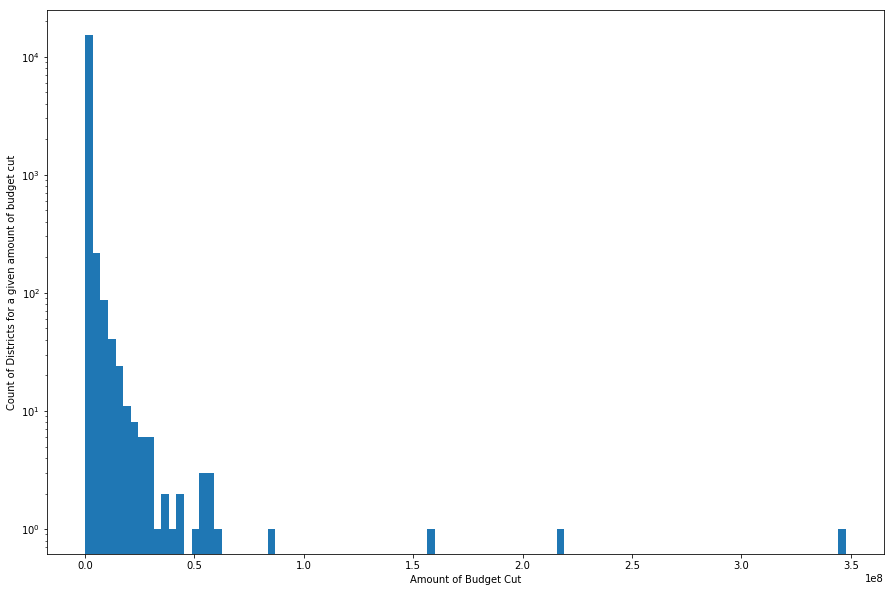

In [107]:
plt.figure()
tocut_df['to_cut'].plot.hist(bins = 100, log = True, figsize = (15,10))
plt.ylabel('Count of Districts for a given amount of budget cut')
plt.xlabel('Amount of Budget Cut')

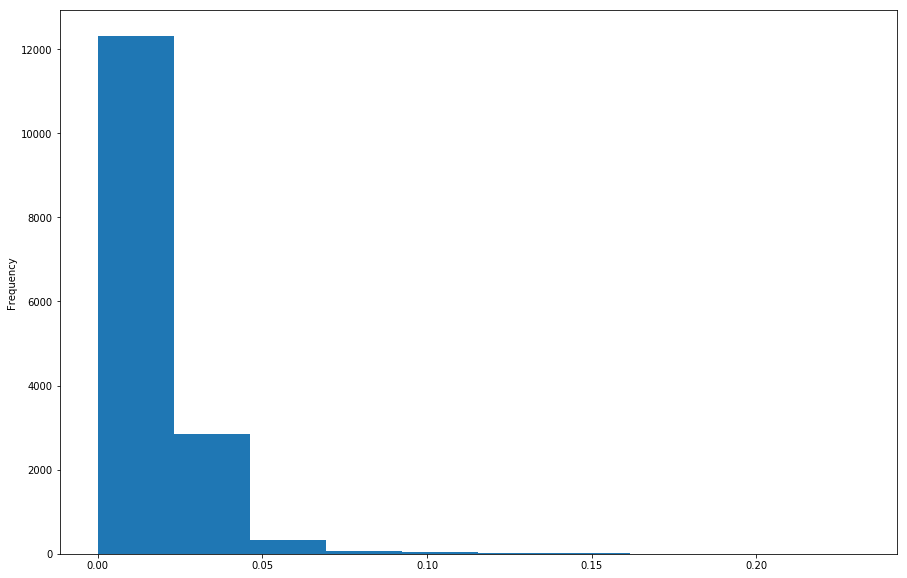

In [108]:
(tocut_df['to_cut']/tocut_df['TOTALEXP']).plot.hist(figsize = (15,10))

## Problem 2

A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden pre-existing biases in the data, and further disadvantage groups that are already disadvantaged.
Calculate the proportion of enrolled students by race for each district, then visualize the distributions of these for districts that received budget cuts versus districts that did not receive budget cuts.
Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

### It appears my strategy of cutting the budgets of districts that have higher per capita expenditures backfired as it appears that the higher per capita spending was targetted at minorities. Of the districts that saw a budget cut, we see higher representation of minorities, For Example: 35% Hispanics (up from 27%) , 20% African Americans (up from 14%). Asians appear to be the only minority demographic whose representation has gone down in the budget cuts.

In [109]:
tocut_df = pd.merge(tocut_df, membership_df[['LEAID', 'TOTAL', 'AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']])

In [110]:
tocut_df['BL_proportion'] = tocut_df['BL'] / tocut_df['TOTAL']
tocut_df['AM_proportion'] = tocut_df['AM'] / tocut_df['TOTAL']
tocut_df['HP_proportion'] = tocut_df['HP'] / tocut_df['TOTAL']
tocut_df['AS_proportion'] = tocut_df['AS'] / tocut_df['TOTAL']
tocut_df['WH_proportion'] = tocut_df['WH'] / tocut_df['TOTAL']
tocut_df['HI_proportion'] = tocut_df['HI'] / tocut_df['TOTAL']
tocut_df['TR_proportion'] = tocut_df['TR'] / tocut_df['TOTAL']

### Proportion of Students across the whole dataset

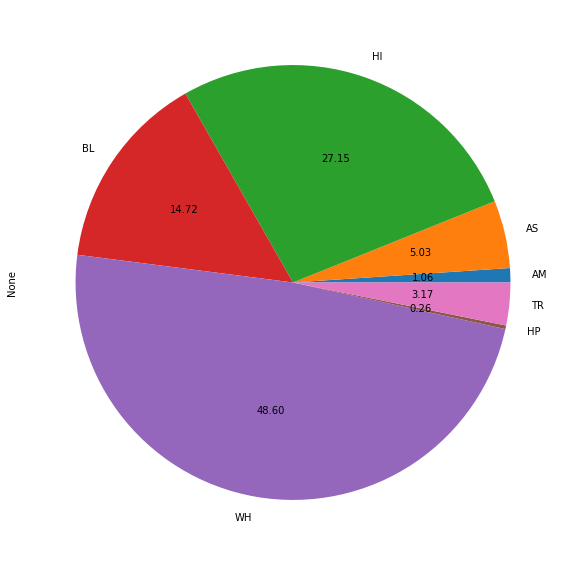

In [111]:
tocut_df[['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of Students that recieved a budget cut

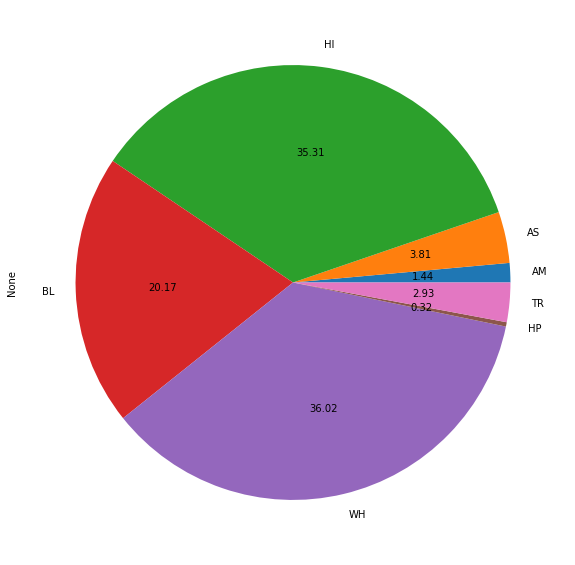

In [112]:
tocut_df[tocut_df['to_cut'] > 0][['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of Students that did not recieve a budget cut

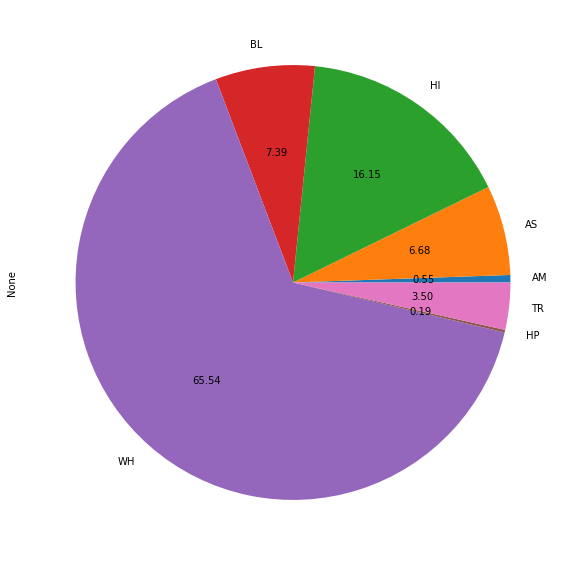

In [113]:
tocut_df[tocut_df['to_cut'] == 0][['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

## Problem 3: 
Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each district, then visualize the distributions of these proportions for districts that received budget cuts versus districts that did not receive budget cuts.Comment on whether the the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

### It appears that my solution has the same effect on disabled and non-disabled students alike.

In [115]:
disabled_df = pd.read_csv('data/ccd_lea_002089_1516_w_1a_011717.csv')

In [118]:
disabled_df = pd.merge(tocut_df, disabled_df)

In [121]:
disabled_df['dis_proportion'] = disabled_df['SPECED'] / disabled_df['TOTAL']

In [128]:
disabled_df['disabled'] = disabled_df['SPECED']

In [130]:
disabled_df['not_disabled'] = disabled_df['TOTAL'] - disabled_df['SPECED']

### Proportion of disabled students across the whole dataset

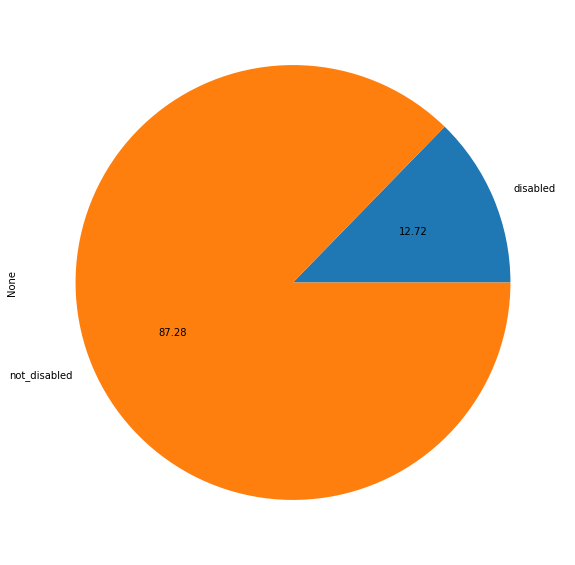

In [134]:
disabled_df[['disabled', 'not_disabled']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Proportion of disabled students recieving a budget cut

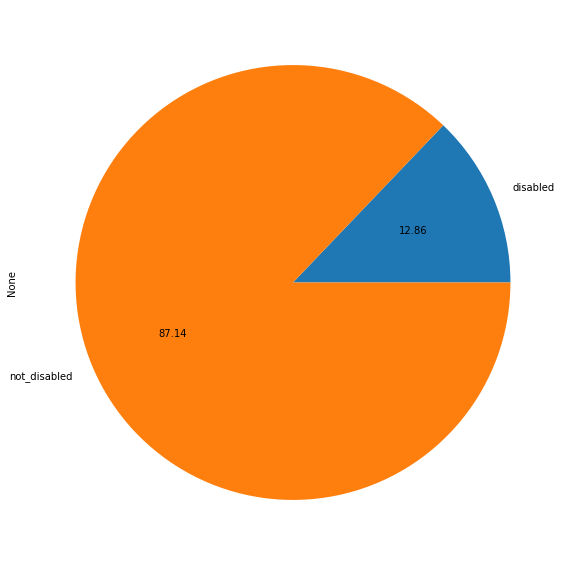

In [135]:
disabled_df[disabled_df['to_cut'] > 0][['disabled', 'not_disabled']].sum().plot.pie(autopct='%.2f', figsize = (10, 10))

### Problem 4
Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4 and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of their approach.


#### I choose Sarthak Kothari's strategy for budget cut. His method appears to be the one least likely to hurt overall as the it minimizes the fiscal panalty for schools that are already not doing so well. Furthermore, it's more nuanced since it's looking at proficiency. On the downside however, it might not be the most fair way as the schools that might be working hard to to achieve profeciency are the ones being penalised the most.

### Problem 5

The mapreduce lecture was very helpful in that it helped us breakdown a very useful framework into it's essential components. This allowed us to get an intuitive sense of what the framework was all about and go and explore firther if neccesary. Furthermore it also allowed me to do well in an inteview recently as well.